In [35]:
# Copyright 2018, JinYoung Kim Softcomputing LAB all rights reserved.
%matplotlib inline
from keras.models import *
from keras.layers import *
from keras.datasets import *
from keras.utils import *
from keras.callbacks import *

import numpy as np
from matplotlib import pyplot as plt

# Load data

## Download MNIST dataset

In [24]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## Pre-processing data

In [25]:
X_train, X_test = X_train / (2. / 255.) - 1, X_test / (2. / 255.) - 1
X_train = np.reshape(X_train, [-1, X_train.shape[1] * X_train.shape[2]])
X_test = np.reshape(X_test, [-1, X_test.shape[1] * X_test.shape[2]])
Y_train, Y_test = np_utils.to_categorical(Y_train), np_utils.to_categorical(Y_test)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 784) (60000, 10)
(10000, 784) (10000, 10)


## Visualization

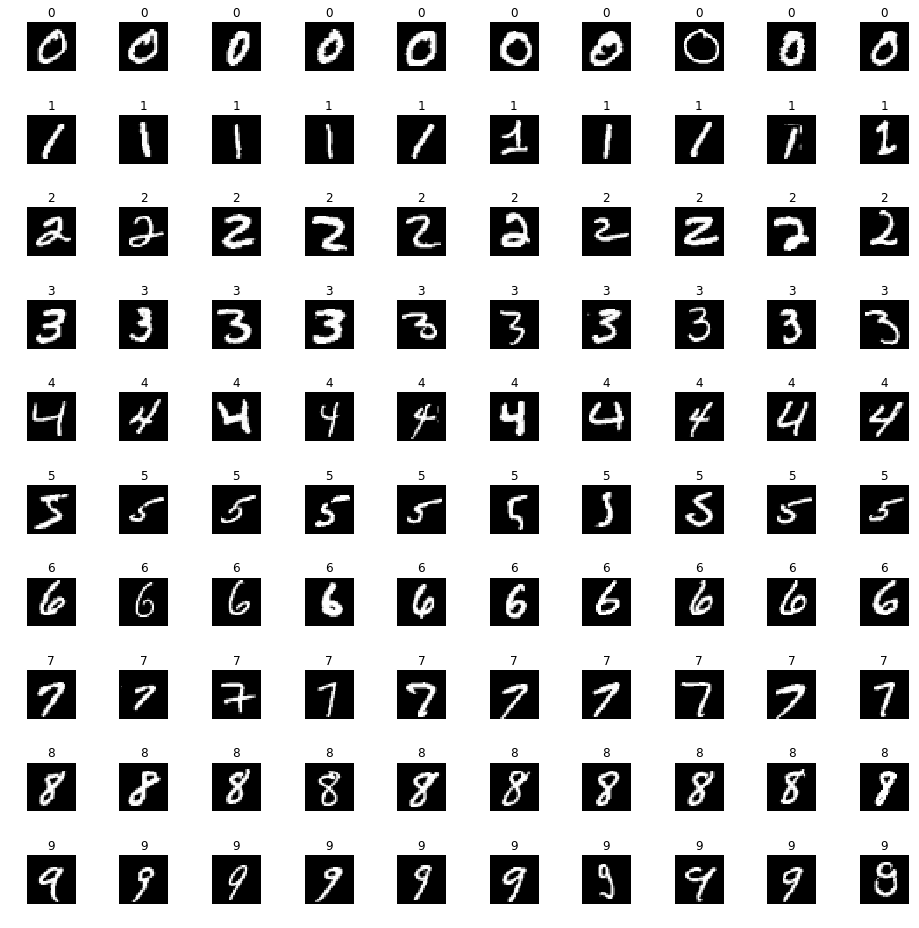

In [14]:
plt.figure(figsize=(13,13))
for i in range(Y_train.shape[1]):
    for j in range(10):
        plt.subplot(10, Y_train.shape[1], i * 10 + j + 1)
        plt.imshow(X_train[Y_train[:,i]==1][j], cmap='gray')
        plt.axis('off')
        plt.title(str(i))
plt.tight_layout()
plt.show()

# Build Basic NN

In [15]:
def Basic_NN(hidden_units, n_class, activation='tanh', dropout = False, dropout_rate = -1, batchnormalization = False):
    if dropout and dropout_rate < 0:
        print('If you use dropout, specify dropout rate between 0 and 1')
        return -1
    def _f(inp):
        x = inp
        for i in range(len(hidden_units)):
            x = Dense(hidden_units[i], activation = activation)(x)
            if batchnormalization:
                x = BatchNormalization()(x)
            if dropout:
                x = Dropout(dropout_rate)(x)
        out = Dense(n_class, activation='softmax')(x)
        return out
    return _f

## Params

In [48]:
# The number of hidden layers = len(hidden_units)
# The number of nodes in i-th hidden layers = hidden_units[i-1]
hidden_units = [512, 512, 512]

# The number of classes
n_class = Y_train.shape[1]

# Activation functions: 'tanh' (default), 'linear', 'relu', 'elu', 'selu', 'sigmoid', etc.
activation = 'tanh'

# Several layers
dropout = True
dropout_rate = 0.25
batchnormalization = True

# Optimizers: 'sgd', 'rmsprop', 'adadelta', 'adam'
optimizer = 'adam'

# Params for training
epochs = 100
batch_size = 512

# Callbacks
callbacks = [EarlyStopping(patience = 5, verbose = 1),
            ReduceLROnPlateau(patience = 3, verbose = 1)]

## Construct model

In [49]:
inp = Input(X_train.shape[1:])
out = Basic_NN(hidden_units, n_class, activation, dropout, dropout_rate, batchnormalization)(inp)

model = Model(inp, out)
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_13 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               262656    
_________________________________________________________________
batch_normalization_14 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
__________

## Train

In [50]:
history = model.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size, verbose = 2,
                   validation_data = [X_test, Y_test], callbacks = callbacks)
training_result = model.evaluate(X_train, Y_train)
print ('Training loss: %.4f, acc: %.2f%%'%(training_result[0], training_result[1] * 100))
test_result = model.evaluate(X_test, Y_test)
print ('Training loss: %.4f, acc: %.2f%%'%(test_result[0], test_result[1] * 100))


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
 - 2s - loss: 0.6378 - acc: 0.8081 - val_loss: 0.4405 - val_acc: 0.8713
Epoch 2/100
 - 1s - loss: 0.4736 - acc: 0.8504 - val_loss: 0.3694 - val_acc: 0.8867
Epoch 3/100
 - 2s - loss: 0.4150 - acc: 0.8668 - val_loss: 0.3193 - val_acc: 0.9025
Epoch 4/100
 - 2s - loss: 0.3935 - acc: 0.8720 - val_loss: 0.3171 - val_acc: 0.9036
Epoch 5/100
 - 1s - loss: 0.4076 - acc: 0.8672 - val_loss: 0.3695 - val_acc: 0.8808
Epoch 6/100
 - 2s - loss: 0.4067 - acc: 0.8667 - val_loss: 0.3726 - val_acc: 0.8764
Epoch 7/100
 - 1s - loss: 0.4009 - acc: 0.8668 - val_loss: 0.3267 - val_acc: 0.8978
Epoch 8/100

Epoch 00008: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
 - 2s - loss: 0.3938 - acc: 0.8712 - val_loss: 0.3324 - val_acc: 0.8935
Epoch 9/100
 - 2s - loss: 0.3848 - acc: 0.8720 - val_loss: 0.2671 - val_acc: 0.9181
Epoch 10/100
 - 2s - loss: 0.3640 - acc: 0.8790 - val_loss: 0.2576 - val_acc: 0.9186
Epoch 11/100
 - 1s - loss: 

## Visualization

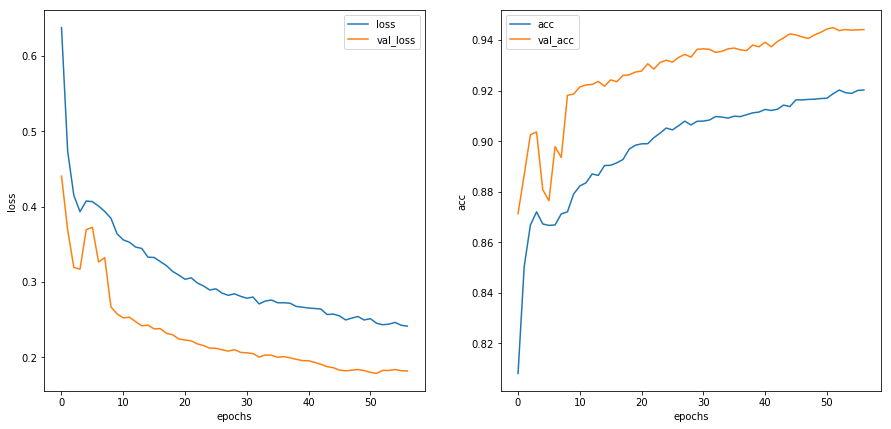

In [51]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend(['acc', 'val_acc'])
plt.show()